# Sunxspex f_vth models

This Jupyter Notebook provides examples of how two (very similar) Python implimentations of IDL/SSW's f_vth are used.

We test both Python f_vths with 3 temperatures (4, 11, 25 MK) and 1 emission measure (1x10$^{44}$ cm$^{-3}$).

Import some useful packages and the code needed for "my" f_vth and Dan's.

In [1]:
# load in some packages
import numpy as np
from astropy import units as u
import time

# where "my" f_vth lives
from photon_models import f_vth

# import Dan's sunxspex branch
import sys
sys.path.append("./sunxspex-thermal")
import sunxspex_dan

Set up the energy bins for the spectrum to be calculated and initiate "my" f_vth.

In [2]:
# define energy steps, this is the same used in the IDL/SSW f_vth load ins
e_lo, e_hi, e_step = 3, 50, 0.5
energy_range = np.arange(e_lo, e_hi, e_step)<<u.keV # energy boundaries

# initiate "my" f_vth
f_vth_sunXspex = f_vth(energy_range)

# assign the f_vth() class method to the name f_vth
f_vth = f_vth_sunXspex.f_vth

# get the middle of each energy bin for "my" f_vth (this most likely should be changed to take the energy bins themselves)
mide = (energy_range.value[1:] + energy_range.value[:-1])/2

In [3]:
# for plotting
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

***

What do the spectra look like for a temperature of **4 MK** and an emission measure of **1x10$^{44}$ cm$^{-3}$**:

./sunxspex/sunxspex/thermal_spectrum.py:387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  neg_deviation_indices, pos_deviation_indices = tuple(np.array(line_deviation_bin_indices)[


Seconds for Sunxspex:  0.019604921340942383
Seconds for Dan's fvth:  0.019104957580566406
Dan's fvth is  1.0261693206209754  times quicker.


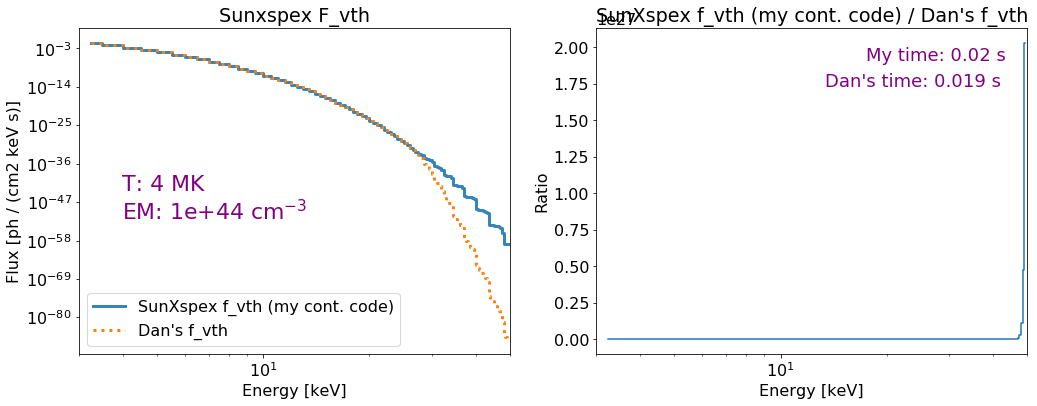

In [4]:
# define the T and EM to use (EM is in units of 1e46 in my code for fitting purposes)
temperature = 4 #<<u.MK
EM = 1e44 #<<u.cm**-3
EM_46 = EM*1e-46 #<<u.cm**-3

# run my code and time it
t1_sunxspex = time.time()
spectrum = f_vth(mide, temperature, EM_46)
t2_sunxspex = time.time()

# run Dan's code and time it
t1_dan = time.time()
spectrum_dan = sunxspex_dan.thermal.thermal_emission(energy_range,
                                                     temperature<<u.MK,
                                                     EM<<u.cm**-3) # fitting use scaled EM
t2_dan = time.time()

# print out some info
print("Seconds for Sunxspex: ", t2_sunxspex-t1_sunxspex)
print("Seconds for Dan\'s fvth: ", t2_dan-t1_dan)
print("Dan\'s fvth is ", (t2_sunxspex-t1_sunxspex)/(t2_dan-t1_dan), " times quicker.")

# plot the outputs and ratio
fig, axs = plt.subplots(1,2, figsize=(17,6))

# spectrum plot
axs[0].loglog(mide, spectrum, drawstyle='steps-mid', 
           label="SunXspex f_vth (my cont. code)", lw=3, alpha=0.9)

axs[0].loglog(mide, spectrum_dan, drawstyle='steps-mid', 
           label="Dan\'s f_vth", linestyle=":", lw=3)


axs[0].set_ylabel('Flux [{:s}]'.format(spectrum_dan.unit.to_string()))
axs[0].set_title("Sunxspex F_vth")
axs[0].legend()

axs[0].annotate("T: "+str(temperature)+" MK", (0.1, 0.5), xycoords="axes fraction", color="purple", size=22)
axs[0].annotate("EM: "+str(EM)+" cm$^{-3}$", (0.1, 0.41), xycoords="axes fraction", color="purple", size=22)

# ratio plot
axs[1].plot(mide, spectrum/spectrum_dan, drawstyle='steps-mid', 
           label="SunXspex Continuum & Lines")
axs[1].set_xscale("log")
axs[1].set_ylabel('Ratio')
axs[1].set_title("SunXspex f_vth (my cont. code) / Dan\'s f_vth")

axs[1].annotate("My time: "+str(round(t2_sunxspex-t1_sunxspex,3))+" s", (0.95, 0.9), xycoords="axes fraction", color="purple", size=18, ha="right")
axs[1].annotate("Dan\'s time: "+str(round(t2_dan-t1_dan,3))+" s", (0.94, 0.82), xycoords="axes fraction", color="purple", size=18, ha="right")

for a in axs:
    a.set_xlim([e_lo, e_hi])
    a.set_xlabel('Energy [{:s}]'.format(energy_range.unit.to_string()))

plt.show()

***

What do the spectra look like for a temperature of **11 MK** and an emission measure of **1x10$^{44}$ cm$^{-3}$**:

Seconds for Sunxspex:  0.022552013397216797
Seconds for Dan's fvth:  0.026072978973388672
Dan's fvth is  0.8649572962197553  times quicker.


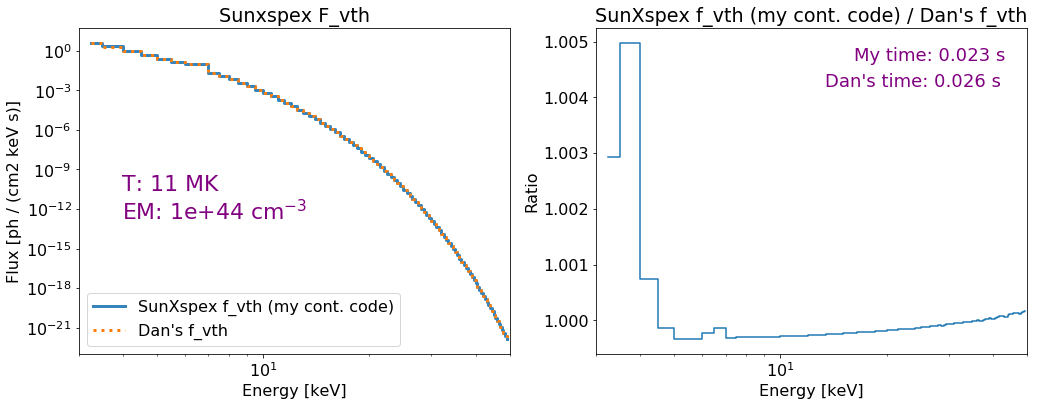

In [5]:
# define the T and EM to use (EM is in units of 1e46 in my code for fitting purposes)
temperature = 11 #<<u.MK
EM = 1e44 #<<u.cm**-3
EM_46 = EM*1e-46 #<<u.cm**-3

# run my code and time it
t1_sunxspex = time.time()
spectrum = f_vth(mide, temperature, EM_46)
t2_sunxspex = time.time()

# run Dan's code and time it
t1_dan = time.time()
spectrum_dan = sunxspex_dan.thermal.thermal_emission(energy_range,
                                                     temperature<<u.MK,
                                                     EM<<u.cm**-3) # fitting use scaled EM
t2_dan = time.time()

# print out some info
print("Seconds for Sunxspex: ", t2_sunxspex-t1_sunxspex)
print("Seconds for Dan\'s fvth: ", t2_dan-t1_dan)
print("Dan\'s fvth is ", (t2_sunxspex-t1_sunxspex)/(t2_dan-t1_dan), " times quicker.")

# plot the outputs and ratio
fig, axs = plt.subplots(1,2, figsize=(17,6))

# spectrum plot
axs[0].loglog(mide, spectrum, drawstyle='steps-mid', 
           label="SunXspex f_vth (my cont. code)", lw=3, alpha=0.9)

axs[0].loglog(mide, spectrum_dan, drawstyle='steps-mid', 
           label="Dan\'s f_vth", linestyle=":", lw=3)


axs[0].set_ylabel('Flux [{:s}]'.format(spectrum_dan.unit.to_string()))
axs[0].set_title("Sunxspex F_vth")
axs[0].legend()

axs[0].annotate("T: "+str(temperature)+" MK", (0.1, 0.5), xycoords="axes fraction", color="purple", size=22)
axs[0].annotate("EM: "+str(EM)+" cm$^{-3}$", (0.1, 0.41), xycoords="axes fraction", color="purple", size=22)

# ratio plot
axs[1].plot(mide, spectrum/spectrum_dan, drawstyle='steps-mid', 
           label="SunXspex Continuum & Lines")
axs[1].set_xscale("log")
axs[1].set_ylabel('Ratio')
axs[1].set_title("SunXspex f_vth (my cont. code) / Dan\'s f_vth")

axs[1].annotate("My time: "+str(round(t2_sunxspex-t1_sunxspex,3))+" s", (0.95, 0.9), xycoords="axes fraction", color="purple", size=18, ha="right")
axs[1].annotate("Dan\'s time: "+str(round(t2_dan-t1_dan,3))+" s", (0.94, 0.82), xycoords="axes fraction", color="purple", size=18, ha="right")

for a in axs:
    a.set_xlim([e_lo, e_hi])
    a.set_xlabel('Energy [{:s}]'.format(energy_range.unit.to_string()))

plt.show()

***

Now what do the spectra look like for a colder temperature of **25 MK** and an emission measure of **1x10$^{44}$ cm$^{-3}$**:

Seconds for Sunxspex:  0.015372753143310547
Seconds for Dan's fvth:  0.02124309539794922
Dan's fvth is  0.723658810325477  times quicker.


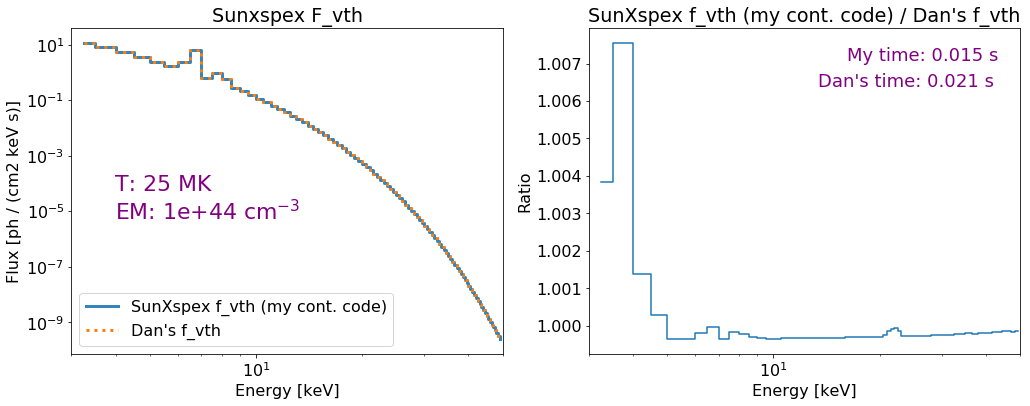

In [6]:
# define the T and EM to use (EM is in units of 1e46 in my code for fitting purposes)
temperature = 25 #<<u.MK
EM = 1e44 #<<u.cm**-3
EM_46 = EM*1e-46 #<<u.cm**-3

# run my code and time it
t1_sunxspex = time.time()
spectrum = f_vth(mide, temperature, EM_46)
t2_sunxspex = time.time()

# run Dan's code and time it
t1_dan = time.time()
spectrum_dan = sunxspex_dan.thermal.thermal_emission(energy_range,
                                                     temperature<<u.MK,
                                                     EM<<u.cm**-3) # fitting use scaled EM
t2_dan = time.time()

# print out some info
print("Seconds for Sunxspex: ", t2_sunxspex-t1_sunxspex)
print("Seconds for Dan\'s fvth: ", t2_dan-t1_dan)
print("Dan\'s fvth is ", (t2_sunxspex-t1_sunxspex)/(t2_dan-t1_dan), " times quicker.")

# plot the outputs and ratio
fig, axs = plt.subplots(1,2, figsize=(17,6))

# spectrum plot
axs[0].loglog(mide, spectrum, drawstyle='steps-mid', 
           label="SunXspex f_vth (my cont. code)", lw=3, alpha=0.9)

axs[0].loglog(mide, spectrum_dan, drawstyle='steps-mid', 
           label="Dan\'s f_vth", linestyle=":", lw=3)


axs[0].set_ylabel('Flux [{:s}]'.format(spectrum_dan.unit.to_string()))
axs[0].set_title("Sunxspex F_vth")
axs[0].legend()

axs[0].annotate("T: "+str(temperature)+" MK", (0.1, 0.5), xycoords="axes fraction", color="purple", size=22)
axs[0].annotate("EM: "+str(EM)+" cm$^{-3}$", (0.1, 0.41), xycoords="axes fraction", color="purple", size=22)

# ratio plot
axs[1].plot(mide, spectrum/spectrum_dan, drawstyle='steps-mid', 
           label="SunXspex Continuum & Lines")
axs[1].set_xscale("log")
axs[1].set_ylabel('Ratio')
axs[1].set_title("SunXspex f_vth (my cont. code) / Dan\'s f_vth")

axs[1].annotate("My time: "+str(round(t2_sunxspex-t1_sunxspex,3))+" s", (0.95, 0.9), xycoords="axes fraction", color="purple", size=18, ha="right")
axs[1].annotate("Dan\'s time: "+str(round(t2_dan-t1_dan,3))+" s", (0.94, 0.82), xycoords="axes fraction", color="purple", size=18, ha="right")

for a in axs:
    a.set_xlim([e_lo, e_hi])
    a.set_xlabel('Energy [{:s}]'.format(energy_range.unit.to_string()))

plt.show()

***